## Project Description

The online store “Wikishop” is launching a new service. Users can now edit and supplement product descriptions, similar to wiki communities. That is, customers suggest their own edits and comment on changes made by others. The store needs a tool that can detect toxic comments and send them for moderation.
Your task is to train a model to classify comments as positive or negative. You are provided with a labeled dataset indicating the toxicity of edits.
The model must achieve an F1 score of at least 0.75.

### Project Instructions

1. Load and prepare the data.
2. Train several models.
3. Draw conclusions.

Using BERT is not mandatory for this project, but may try it if you wish.

### Data Description

The data is stored in the file `toxic_comments.csv`. The 'text' column contains the comment text, and 'toxic' is the target variable.

# 1. Data Preparation

In [618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import notebook
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [545]:
df = pd.read_csv('/Users/fidanb/Downloads/toxic.csv')
df 

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
159566,159566,""":::::And for the second time of asking, when ...",0
159567,159567,You should be ashamed of yourself \n\nThat is ...,0
159568,159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,159569,And it looks like it was actually you who put ...,0


In [546]:
del df['Unnamed: 0']

In [547]:
df

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [548]:
df['toxic'].value_counts()

0    143346
1     16225
Name: toxic, dtype: int64

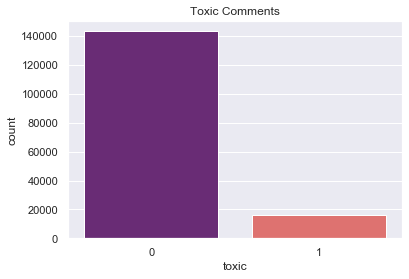

In [549]:
sns.countplot(x = 'toxic',  data = df, palette = 'magma')
plt.title('Toxic Comments')
sns.set()
plt.show()

Text(0.5, 0.98, 'Average word length in each comment')

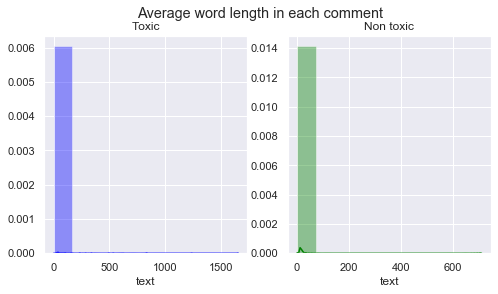

In [550]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))
word=df[df['toxic']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, bins=10,kde=True,color='blue')
ax1.set_title('Toxic')
word=df[df['toxic']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,bins=10,color='green')
ax2.set_title('Non toxic')
fig.suptitle('Average word length in each comment')

In [617]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/fidanb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/fidanb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fidanb/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [554]:
df

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [555]:
X = df.drop('toxic',axis=1)
y =df['toxic']

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=12345)

In [557]:
X_train_cor = X_train.values.astype('U')
X_test_cor = X_test.values.astype('U')

In [558]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((111699, 1), (47872, 1), (111699,), (47872,))

In [559]:
X_train

,text
5982,"""\nI think Access Denied is a perfectly valid ..."
155963,Please stop abusing the word hopefully! \n\nIg...
57212,Progressive Dance music \n\nI see you don't su...
125660,"Japanese characters \n\nThey annoy me, this is..."
105510,"""\n\nYeah it does seem kind of over - and jus..."
...,...
109993,"Gam, keep your CRAP off my Talk Page\n\nYour K..."
85412,I corrected what you listed.-
133249,"""\n\nhmm, yes, as I said: I also """"watch"""" the..."
130333,kinda like miachael jackson


In [562]:
# Using re.sub() to clean the text from unnecessary characters:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r"   ", " ", text)
    return text
X_train["clean_text"] = X_train["text"].apply(lambda text: clean_text(text))
X_test["clean_text"] = X_test["text"].apply(lambda text: clean_text(text))

In [563]:
# Function to remove unnecessary punctuation:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
X_train["clean_text"] = X_train["clean_text"].apply(lambda text: remove_punct(text))
X_test["clean_text"] = X_test["clean_text"].apply(lambda text: remove_punct(text))

In [616]:
# Function to remove stopwords:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

X_train["clean_text"] = X_train["clean_text"].apply(lambda text: remove_stopwords(text))
X_test["clean_text"] = X_test["clean_text"].apply(lambda text: remove_stopwords(text))

In [565]:
X_train

,text,clean_text
5982,"""\nI think Access Denied is a perfectly valid ...",think access denied perfectly valid username r...
155963,Please stop abusing the word hopefully! \n\nIg...,please stop abusing word hopefully ignorant am...
57212,Progressive Dance music \n\nI see you don't su...,progressive dance music see surrender eh else ...
125660,"Japanese characters \n\nThey annoy me, this is...",japanese characters annoy english page get rid...
105510,"""\n\nYeah it does seem kind of over - and jus...",yeah seem kind let know never mad made schmuck...
...,...,...
109993,"Gam, keep your CRAP off my Talk Page\n\nYour K...",gam keep crap talk page kkk style rants welcom...
85412,I corrected what you listed.-,corrected listed
133249,"""\n\nhmm, yes, as I said: I also """"watch"""" the...",hmm yes said also watch emily ruete article wr...
130333,kinda like miachael jackson,kinda like miachael jackson


##### Even after cleaning the text from unnecessary words and symbols, there are still “filler words” like hmm, yeah, kinda, kkk, etc. As I understand it, it is difficult to completely remove them automatically, so one has to create a list of such words and pass them to the clean_text(text) function, for example:

In [566]:
# I created a dictionary and then lemmatized the text:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

X_train["clean_text"] = X_train["clean_text"].apply(lambda text: lemmatize_words(text))
X_test["clean_text"] = X_test["clean_text"].apply(lambda text: lemmatize_words(text))

In [567]:
del X_train['text']
del X_test['text']

In [568]:
X_train

,clean_text
5982,think access deny perfectly valid username rem...
155963,please stop abuse word hopefully ignorant amer...
57212,progressive dance music see surrender eh else ...
125660,japanese character annoy english page get rid ...
105510,yeah seem kind let know never mad make schmuck...
...,...
109993,gam keep crap talk page kkk style rant welcome...
85412,correct list
133249,hmm yes say also watch emily ruete article wri...
130333,kinda like miachael jackson


In [569]:
X_train_cor = X_train["clean_text"].values.astype('U')
X_test_cor = X_test["clean_text"].values.astype('U')

In [587]:
count_tf_idf = TfidfVectorizer(max_features=5000)
count_tf_idf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [588]:
tf_idf_train = count_tf_idf.fit_transform(X_train_cor)

In [589]:
tf_idf_test = count_tf_idf.transform(X_test_cor)

In [590]:
print("Размер матрицы train:", tf_idf_train.shape)
print("Размер матрицы test:", tf_idf_test.shape)

Размер матрицы train: (111699, 5000)
Размер матрицы test: (47872, 5000)


# 2. Model Training

In [591]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

##### Logistic Regression

In [417]:
# Hyperparameter Tuning:
max_iter=[100,110,120]
grid={"C":np.logspace(-3,3,7), "max_iter" : max_iter, "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state = 12345)
logreg_cv=GridSearchCV(logreg,grid,cv=3)
logreg_cv.fit(tf_idf_train, y_train)

print('Best C:', logreg_cv.best_estimator_.get_params()['C'])
print('Best Penalty:', logreg_cv.best_estimator_.get_params()['penalty'])
print('Best max_iter:', logreg_cv.best_estimator_.get_params()['max_iter'])

Best C: 1.0
Best Penalty: l1
Best max_iter: 100


In [592]:
logreg2=LogisticRegression(random_state = 12345, C=1,max_iter=100, penalty="l1")

In [593]:
logreg2.fit(tf_idf_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=12345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [594]:
pred = logreg2.predict(tf_idf_test)

In [595]:
print("F1 score for Logistic Regression: ",f1_score(y_test, pred).round(3))

F1 score for Logistic Regression:  0.781


In [596]:
auc_score = roc_auc_score(y_test, pred)
print("ROC_AUC score for Logistic Regression: {}\n".format(auc_score.round(3)))

ROC_AUC score for Logistic Regression: 0.842



##### Random Forest

In [597]:
from sklearn.ensemble import RandomForestClassifier

In [424]:
rfc=RandomForestClassifier(random_state=12345)

In [425]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(tf_idf_train, y_train)
print('n_estimators:', CV_rfc.best_estimator_.get_params()['n_estimators'])
print('max_features:', CV_rfc.best_estimator_.get_params()['max_features'])
print('max_depth:', CV_rfc.best_estimator_.get_params()['max_depth'])
print('criterion:', CV_rfc.best_estimator_.get_params()['criterion'])

n_estimators: 100
max_features: auto
max_depth: 8
criterion: gini


In [598]:
rfc1=RandomForestClassifier(random_state=12345, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')

In [599]:
rfc1.fit(tf_idf_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [600]:
predic=rfc1.predict(tf_idf_test)
print("F1 score for Random Forest: ",f1_score(y_test, predic).round(3))

F1 score for Random Forest:  0.012


In [601]:
auc_score = roc_auc_score(y_test, predic)
print("ROC_AUC score for Random Forest: {}\n".format(auc_score.round(3)))

ROC_AUC score for Random Forest: 0.503



##### Decision Tree

In [602]:
from sklearn.tree import DecisionTreeClassifier

In [431]:
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=12345), params, verbose=1, cv=3)
grid_search_cv.fit(tf_idf_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12345,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4]},
        

In [432]:
print('max_leaf_nodes:', grid_search_cv.best_estimator_.get_params()['max_leaf_nodes'])
print('min_samples_split:', grid_search_cv.best_estimator_.get_params()['min_samples_split'])

max_leaf_nodes: 9
min_samples_split: 2


In [603]:
dtc=DecisionTreeClassifier(random_state=12345,max_leaf_nodes=9,min_samples_split=2)
dtc.fit(tf_idf_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

In [604]:
prediction=rfc1.predict(tf_idf_test)
print("F1 score for Decision Tree: ",f1_score(y_test, prediction).round(3))

F1 score for Decision Tree:  0.012


In [605]:
auc_score = roc_auc_score(y_test, prediction)
print("ROC_AUC score for Decision Tree: {}\n".format(auc_score.round(3)))

ROC_AUC score for Decision Tree: 0.503



##### XGBClassifier

In [507]:
#conda install -c conda-forge xgboost

In [606]:
from xgboost import XGBClassifier

In [509]:
#pars = { 'n_estimators': [100, 250, 500],
    #     'max_depth': [6, 9, 12],
    #     'subsample': [0.9, 1.0],
    #          }

In [510]:
#grid_search_xg = GridSearchCV( XGBClassifier(random_state=12345), pars, verbose=1, cv=3)
#grid_search_xg.fit(tf_idf_train, y_train)

In [511]:
#print('n_estimators:', grid_search_xg.best_estimator_.get_params()['n_estimators'])
#print('subsample:', grid_search_xg.best_estimator_.get_params()['subsample'])
#print('max_depth:', grid_search_xg.best_estimator_.get_params()['max_depth'])

In [607]:
xgb = XGBClassifier( n_estimators=100, subsample=0.9, max_depth=9)

In [608]:
xgb.fit(tf_idf_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [609]:
predn=rfc1.predict(tf_idf_test)
print("F1 score for XgBoost: ",f1_score(y_test, predn).round(3))

F1 score for XgBoost:  0.012


In [610]:
auc_score = roc_auc_score(y_test, predn)
print("ROC_AUC score for XgBoost: {}\n".format(auc_score.round(3)))

ROC_AUC score for XgBoost: 0.503



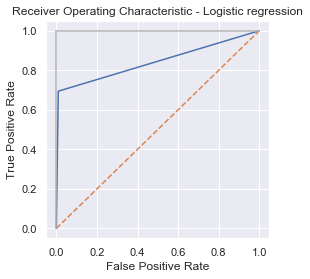

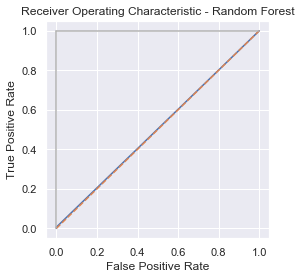

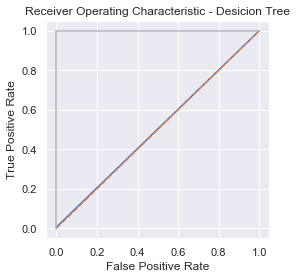

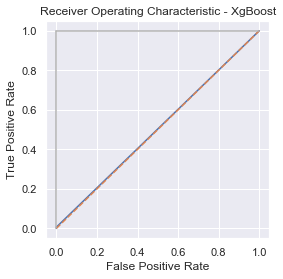

In [611]:
false_positive_rate1, true_positive_rate1, threshold1 = metrics.roc_curve(y_test,  pred)
false_positive_rate2, true_positive_rate2, threshold2 = metrics.roc_curve(y_test,  predic)
false_positive_rate3, true_positive_rate3, threshold3 = metrics.roc_curve(y_test,  prediction)
false_positive_rate4, true_positive_rate4, threshold4 = metrics.roc_curve(y_test,  predn)
 # Plot ROC curves
plt.subplots(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], label="Auc="+str(threshold1 ), ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.subplots(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], label="Auc="+str(threshold2 ), ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.subplots(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic - Desicion Tree')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], label="Auc="+str(threshold3 ), ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.subplots(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic - XgBoost')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], label="Auc="+str(threshold4 ), ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [612]:
classifiers = [LogisticRegression(random_state=1234),  
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
               XGBClassifier(random_state=12345)]

In [613]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(tf_idf_train, y_train)
    yproba = model.predict_proba(tf_idf_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

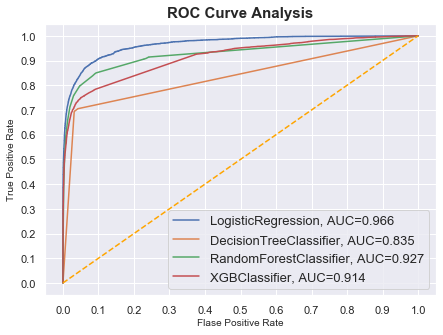

In [614]:
fig = plt.figure(figsize=(7,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=10)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

# 3. Conclusions

For data preprocessing, I used the NLTK library and TfidfVectorizer(). Then, I trained and predicted comment toxicity using Logistic Regression, Decision Tree, Random Forest, and XGBoost models. The best F1 score was achieved by Logistic Regression (0.781), indicating that the model effectively classifies comments as positive or negative.